# Part One: Network Models

###  Watts-Strogatz Networks

 - Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
 - Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


In [17]:
# let´s create the graph
import networkx as nx
import matplotlib.pyplot as plt
from __future__ import division

n = 500
k = 4

# The rewiring probability
p = [0,0.1,0.5,1,2]

# Creating 5 watts-Strogatzh Networks with different rewiring probability
G_nx1 = nx.watts_strogatz_graph(n,k,p[0]) # rewiring probability = 0
G_nx2 = nx.watts_strogatz_graph(n,k,p[1]) # rewiring probability = 0.1
G_nx3 = nx.watts_strogatz_graph(n,k,p[2]) # rewiring probability = 0.5
G_nx4 = nx.watts_strogatz_graph(n,k,p[3]) # rewiring probability = 1
G_nx5 = nx.watts_strogatz_graph(n,k,p[4]) # rewiring probability = 2

print("The average shortest path length with rewiring probability of {} is {}".format(p[0],nx.average_shortest_path_length(G_nx1)))
print("The average shortest path length with rewiring probability of {} is {}".format(p[1],nx.average_shortest_path_length(G_nx2)))
print("The average shortest path length with rewiring probability of {} is {}".format(p[2],nx.average_shortest_path_length(G_nx3)))
print("The average shortest path length with rewiring probability of {} is {}".format(p[3],nx.average_shortest_path_length(G_nx4)))
print("The average shortest path length with rewiring probability of {} is {}".format(p[4],nx.average_shortest_path_length(G_nx4)))

The average shortest path length with rewiring probability of 0 is 62.875751503
The average shortest path length with rewiring probability of 0.1 is 8.24801603206
The average shortest path length with rewiring probability of 0.5 is 4.99740280561
The average shortest path length with rewiring probability of 1 is 4.74648496994
The average shortest path length with rewiring probability of 2 is 4.74648496994


2

**Describe what happens to the network when p=1.**
   - One of the characteristic of a random network model is that it contains low average path lenght, meaning that there tends to be a path between a pair of nodes that involves only a few edges. This is called the small world problem and the average distance in such a network can be described by the following formula <d> = ln(N)/ln(k), where k is the average degree of the network and N is the number of nodes in the network. 
    
   - In a Watts storgatz p stands for the probability that an edge is rewired, meaning that the edge is disconnected from one of its nodes and randomly connected to another node anywhere in the network. Each edge is chosen to be rewired independent with probability p. 
    
   - So when the probability is low then most connections are still in the original form, therefore they connect to the original local connections, they connect nodes that are nearby in the lattice (Each node connects to the neighbours that are nearest to them). But some of the rewired edges might turn into long distance connections that connects nodes that are far away from each other therefore connecting two (possibly far apart) parts of the network, making it much shorter for members of these two parts to reach the other part. These paths are called shortcuts and they lower the overall average path lenght of the network, so when P increases more and more rewiring happens. When P = 1 then all of the edges in the network have been rewired and we essentially end up have a random network that has fixed numbers of edges. 
    
    info taken from this website [here](http://mathinsight.org/small_world_network)

### The behavior investigation

Let's investigate this behavior in detail. Generate 50 networks with N=500N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [14]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 500
k = 4
p_values = [0,0.01,0.03,0.05,0.1,0.2]

networks = collections.defaultdict(list)
avgs = collections.defaultdict(float)
stds = collections.defaultdict(float)

# creating a list that contains 50 networks for each p
# calculating the average distance for each network
# calculatin the std of the average distance 
for i,p in enumerate(p_values):
    # Use list comprehension to create 50 instances of the network
    networks[i] = [nx.watts_strogatz_graph(n,k,p) for j in range(50)]
    average_d = [nx.average_shortest_path_length(network) for network in networks[i]]
    avgs[i] = np.mean(average_d) 
    stds[i] = np.std(average_d)

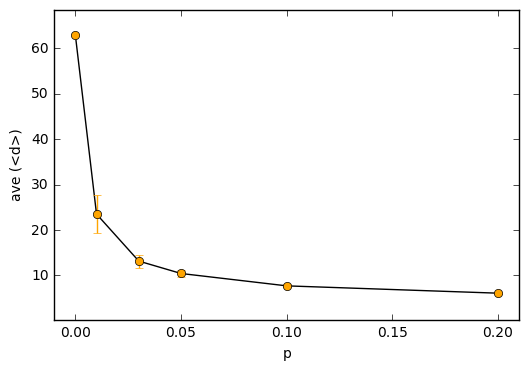

In [7]:
# Finally plot up the Watts-Strogatz models

plt.figure()
plt.plot(p_values, avgs.values(),color="black")
plt.errorbar(p_values, avgs.values(), xerr=0, yerr=stds.values(), fmt="o", color="orange")
plt.ylabel('ave (<d>)')
plt.xlabel('p')
plt.margins(0.05,0.10)
plt.show()

# The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success

- Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX. Now create a 5000 node network.
    - What's the maximum and minimum degree?
    - Now, bin the degree distribution, for example using numpy.histogram.
    - Plot the distribution. Plot it with both linear and log-log axes.

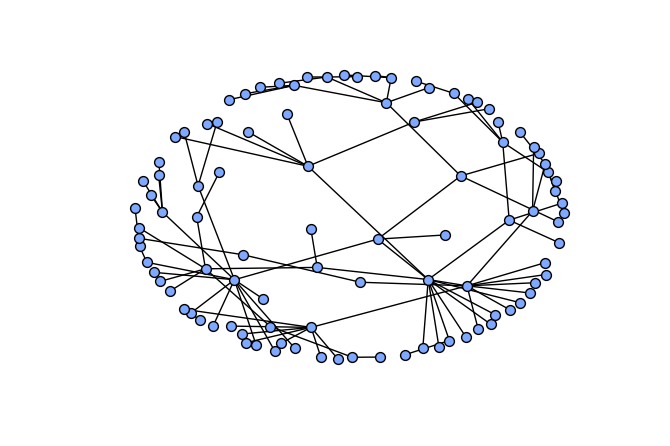

The minimum degree of the network is: 1
The maximum degree of the network is: 126


In [40]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create barabasi Albert network
G = nx.Graph()
# adding first notes and one edge
G.add_node(1)
G.add_node(2)
G.add_edge(1,2)


def barabasi_add_node(graph,nodeid):
    # get all edges and flaten the list of edges out (remove connection information)
    # then we use np.random.choice to choose one node out of the list
    node = np.random.choice([node for edge in graph.edges() for node in edge])

    # Create a edge from the newly created note to the chosen note
    graph.add_edge(nodeid,node)

# we then add nodes incrementivally until we reach 100 nodes and in each time a node is added, 
#   the node is connected to one of the existing nodes in proportion to their degree (see page 8 chapter 5)
for i in range(3,101):
    barabasi_add_node(G,i)

# plot the network
nx.draw_spring(G,node_size = 50, node_color = "#7FA8FF", with_labels = False, edge_color = "black" )
plt.show()

# Now we add more nodes until we reach total of 500 nodes
for i in range(101,5001):
    barabasi_add_node(G,i)

# Find the maximum and minimum degree of the network
print "The minimum degree of the network is: {}".format(min(G.degree().values()))
print "The maximum degree of the network is: {}".format(max(G.degree().values()))



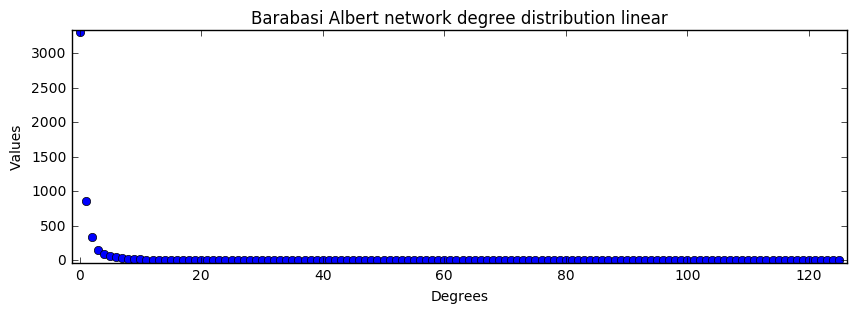

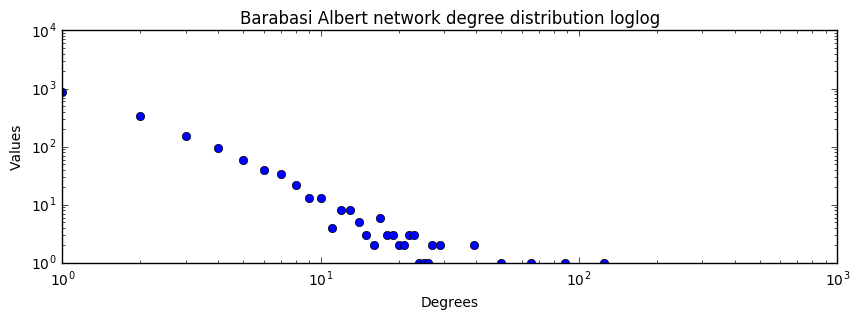

In [45]:
# Plot the distribution, both linear and log-log axes

# bin the degree distribution using np.histogram
values, bins = np.histogram(G.degree().values(), bins=max(G.degree().values()))
#values = nx.degree_histogram(G), could also been done with nx.degree_histogram(G)

# linear plot
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(range(0,len(values)), values,'o')
plt.margins(0.01,0.01)
#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("Barabasi Albert network degree distribution linear")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

# log log plot
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(range(0,len(values)), values,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Barabasi Albert network degree distribution log log axis")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()